<a href="https://colab.research.google.com/github/LillWawrence/consulting_skills_exam/blob/mollybranch/mollyconsulting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
articles = pd.read_csv('articles.B2M.csv')
authors = pd.read_csv('authors.B2M.csv')
papercounts = pd.read_csv('paper_counts.csv')
display(articles)


,PMID,Title,Abstract,ISSN,Journal,Location,Year,FirstAuthorForename,FirstAuthorLastname,FirstAuthorInitials,FirstAuthorAffiliation
0,10575721,[Computer-assisted preoperative planning of kn...,The general configuration of replaced knee is ...,0035-1040,Revue de chirurgie orthopedique et reparatrice...,(85) 591-600,1999,E,Nerkowski,E,"Equipe B2M, ENSAM, Aix-en-Provence."
1,10617805,[Urogenital amyloidosis: clinico-pathological ...,Amyloidosis of the genito-urinary tract is unc...,0242-6498,Annales de pathologie,(19) 487-91,1999,M,Esslimani,M,"Service d'Anatomie Pathologique, Hôpital Gui d..."
2,10656443,Serum beta-2 microglobulin levels are a signif...,Our objective was to investigate the prognosti...,1078-0432,Clinical cancer research : an official journal...,(6) 147-52,2000,J,Rodriguez,J,"Department of Leukemia, University of Texas M...."
3,10790290,Exposure of Daudi cells to low-frequency magne...,The effect of extremely low-frequency electrom...,0033-7587,Radiation research,(153) 663-9,2000,C A,Morehouse,CA,FDA Center for Devices and Radiological Health...
4,10793017,Effects of dialyzer reuse on the permeability ...,Little attention has been given to the effects...,1523-6838,American journal of kidney diseases : the offi...,(35) 839-44,2000,J P,Matos,JP,"Department of Internal Medicine, Division of N..."
...,...,...,...,...,...,...,...,...,...,...,...
660,37889281,Artificial intelligence in early detection and...,Acute kidney injury (AKI) has a significant im...,1432-198X,"Pediatric nephrology (Berlin, Germany)",10.1007/s00467-023-06191-7,2023,Rupesh,Raina,R,Akron Nephrology Associates/Cleveland Clinic A...
661,37972698,Screening the optimal housekeeping genes (HKGs...,Selection of stable housekeeping genes (HKGs) ...,1879-0038,Gene,(895) 147966,2023,Nanjian,Luo,N,"School of Preclinical Medicine, Zunyi Medical ..."
662,38048169,Proteomics Analysis of Serum Reveals Potential...,"Heart failure (HF), a complex clinical syndrom...",1535-3907,Journal of proteome research,10.1021/acs.jproteome.3c00537,2023,Taohua,Lan,T,State Key Laboratory of Dampness Syndrome of C...
663,38053293,Highly efficient genome editing via CRISPR-Cas...,The CRISPR-Cas9 system has significantly advan...,1976-670X,BMB reports,5981,2023,A Reum,Han,AR,NaN


In [ ]:
newarticles = articles[articles['Year'].isin([2020,2021,2022, 2023])]
#display(newarticles)

publicationauthors = newarticles[['FirstAuthorLastname', 'FirstAuthorInitials']].value_counts(ascending=False)

# Filter publicationauthors to show only those with counts greater than 2
authors_with_multiple_pubs = publicationauthors[publicationauthors > 1]
display(authors_with_multiple_pubs)


,,count
FirstAuthorLastname,FirstAuthorInitials,
Thongsin,N,3
Wang,X,3
Agrawal,S,2
Iversen,E,2
Gorji-Bahri,G,2
Rasmussen,M,2
Jiang,S,2
Hu,X,2
Wang,GH,2


In [ ]:
authors.info()
#4 initials,1 forename 1375 affliation missing
articles.info()
#same number missing



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   PMID               5797 non-null   int64 
 1   AuthorN            5797 non-null   int64 
 2   AuthorForename     5796 non-null   object
 3   AuthorLastname     5797 non-null   object
 4   AuthorInitials     5793 non-null   object
 5   AuthorAffiliation  4422 non-null   object
dtypes: int64(2), object(4)
memory usage: 271.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   PMID                    665 non-null    int64 
 1   Title                   665 non-null    object
 2   Abstract                665 non-null    object
 3   ISSN                    665 non-null    object
 4   Journal                 665 non-null    obje

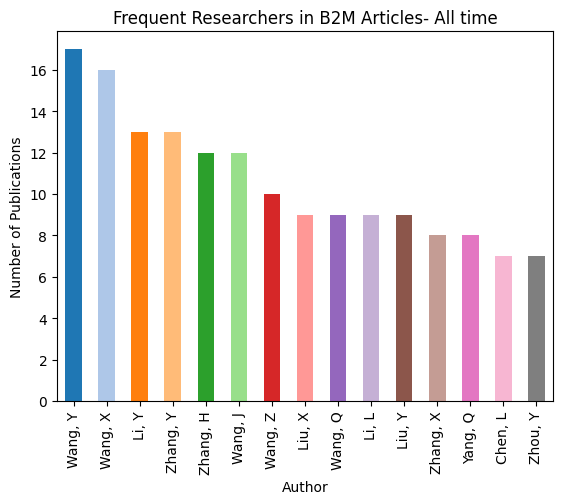

In [ ]:
authors['FullName'] = authors['AuthorLastname'] + ', ' + authors['AuthorInitials']
author_count = authors['FullName'].value_counts()

#top researchers - considering all time first

author_count.head(15)

#plotting this

import matplotlib.pyplot as plt
barplotauthor=author_count.head(15).plot(kind='bar', color=plt.cm.tab20(range(15)))
plt.title('Frequent Researchers in B2M Articles- All time')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.show()


In [ ]:
#narrowing this down to more recent publications - we have set this as research after 2020

recentarticles=articles[articles['Year']>=2020]
#display(recentarticles)
#213 articles

recentauthors=authors[authors['PMID'].isin(recentarticles['PMID'])]
#display(recentauthors)
#2246

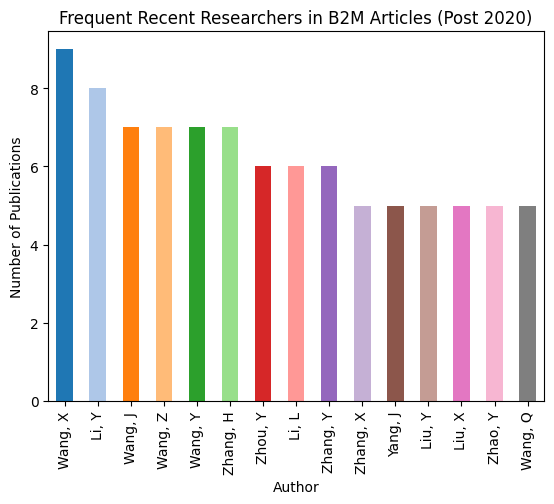

In [ ]:
#frequent and recent - combination
recentauthors_count=recentauthors['FullName'].value_counts()
recentauthors_count.head(15)
import matplotlib.pyplot as plt
barplotrecentauthor=recentauthors_count.head(15).plot(kind='bar', color=plt.cm.tab20(range(15)))
plt.title('Frequent Recent Researchers in B2M Articles (Post 2020)')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.show()

,Year,b2m_count,Count,b2m_percent
0,1997,2,313743,0.000637
1,1998,1,329438,0.000304
2,1999,3,340740,0.000880
3,2000,5,373439,0.001339
4,2001,2,388963,0.000514
5,2002,9,405519,0.002219
6,2003,4,426752,0.000937
7,2004,8,459362,0.001742
8,2005,5,492511,0.001015
9,2006,11,521278,0.002110


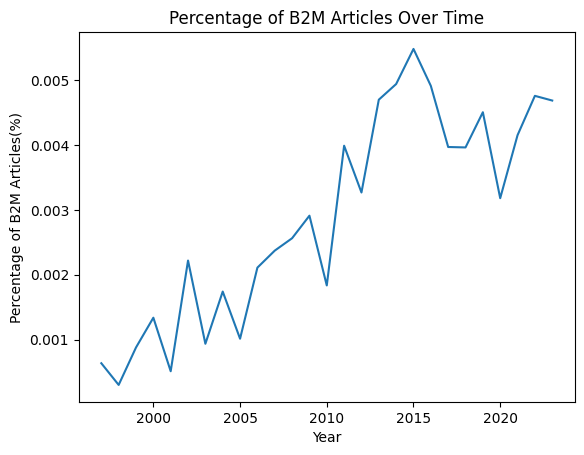

In [ ]:
#research interest over the year

#paper counts unique PMID

b2m_peryear=(articles.drop_duplicates(subset=['PMID']).groupby('Year').size().reset_index(name='b2m_count'))
#display(b2m_peryear)
researchinterest=pd.merge(b2m_peryear, papercounts, on='Year', how='inner')
#display(researchinterest)

researchinterest['b2m_percent']=researchinterest['b2m_count']*100/researchinterest['Count']
display(researchinterest)

#plotting this

plt.plot(researchinterest['Year'],researchinterest['b2m_percent'])
plt.title('Percentage of B2M Articles Over Time')
plt.xlabel('Year')
plt.ylabel('Percentage of B2M Articles(%)')
plt.show()


In [ ]:
#collaborators

from itertools import combinations
import pandas as pd

# Merge year into authors
mergingauthors = authors.merge(
    articles[["PMID", "Year"]],
    on="PMID",
    how="left"
)

# Filter to recent papers and make a copy
authors_recent = mergingauthors[mergingauthors["Year"] >= 2020].copy()

# Drop rows with missing author info
authors_recent = authors_recent.dropna(
    subset=["AuthorInitials", "AuthorLastname"]
)

# Create author name
authors_recent["Author"] = (
    authors_recent["AuthorInitials"].str.strip() + " " +
    authors_recent["AuthorLastname"].str.strip()
)

coauthors_list = []

for pmid, group in authors_recent.groupby("PMID"):
    authors_in_pmid = group["Author"].unique()
    if len(authors_in_pmid) >= 2:
        for a, b in combinations(sorted(authors_in_pmid), 2):
            coauthors_list.append((a, b))

coauthor_counts = (
    pd.DataFrame(coauthors_list, columns=["Author1", "Author2"])
    .value_counts()
    .reset_index(name="Count")
)

display(coauthor_counts.head(15))


,Author1,Author2,Count
0,H Zhang,X Wang,4
1,S Schrepfer,T Deuse,3
2,H Zhang,Y Zhou,3
3,L Li,X Wang,3
4,D Li,Y Li,3
5,M Wattanapanitch,N Thongsin,3
6,C Gattis,X Hu,2
7,C Gattis,WE Dowdle,2
8,JY Song,V Bedell,2
9,JY Song,W Zhang,2


In [ ]:
from itertools import combinations
import pandas as pd


mergingauthors = authors.merge(
    articles[["PMID", "Year"]],
    on="PMID",
    how="left"
)


authors_recent = mergingauthors[mergingauthors["Year"] >= 2020].copy()

authors_recent = authors_recent.dropna(
    subset=["AuthorInitials", "AuthorLastname"]
)


authors_recent["Author"] = (
    authors_recent["AuthorInitials"].str.strip() + " " +
    authors_recent["AuthorLastname"].str.strip()
)


coauthors_list = []

for pmid, group in authors_recent.groupby("PMID"):
    authors_in_pmid = group["Author"].unique()
    if len(authors_in_pmid) >= 2:
        for author1, author2 in combinations(sorted(authors_in_pmid), 2):
            coauthors_list.append((pmid, author1, author2))


coauthors = pd.DataFrame(
    coauthors_list,
    columns=["PMID", "Author1", "Author2"]
)


coauthor_summary = (
    coauthors
    .groupby(["Author1", "Author2"])
    .agg(
        Count=("PMID", "nunique"),
        PMIDs=("PMID", lambda x: list(x.unique()))
    )
    .reset_index())

top_coauthors = coauthor_summary.sort_values("Count", ascending=False)

display(top_coauthors)



,Author1,Author2,Count,PMIDs
9054,H Zhang,X Wang,4,"[33658560, 35368100, 36055572, 36868208]"
15515,S Schrepfer,T Deuse,3,"[36593395, 37037829, 37156915]"
9064,H Zhang,Y Zhou,3,"[33658560, 34305082, 36868208]"
12201,L Li,X Wang,3,"[35368100, 35841593, 36055572]"
5556,D Li,Y Li,3,"[31935552, 35343934, 35841593]"
...,...,...,...,...
5534,D Li,Q Sui,1,[35343934]
5535,D Li,Q Wang,1,[35841593]
5536,D Li,Q Wu,1,[35841593]
5537,D Li,Q Zhang,1,[35841593]


,FullName,PMIDs,PaperCount
1,"Li, Y","[31729180, 31935552, 32746912, 35298836, 35343...",8
6,"Wang, X","[32746912, 33658560, 34975342, 35368100, 35841...",8
4,"Wang, J","[33892543, 34323289, 35368100, 35573408, 36016...",7
7,"Wang, Y","[31729180, 34323289, 35368100, 35982994, 36460...",7
0,"Li, L","[35109922, 35368100, 35841593, 36055572, 36624...",6
8,"Wang, Z","[33658560, 34485161, 36046045, 36277688, 36460...",6
10,"Zhang, H","[33231514, 33658560, 34305082, 35368100, 36055...",6
5,"Wang, Q","[33231514, 33754492, 34242779, 35841593, 37550...",5
3,"Liu, Y","[31959909, 32930470, 34242779, 35501457, 36107...",5
2,"Liu, X","[31918111, 35321689, 35368100, 36055572, 36606...",5


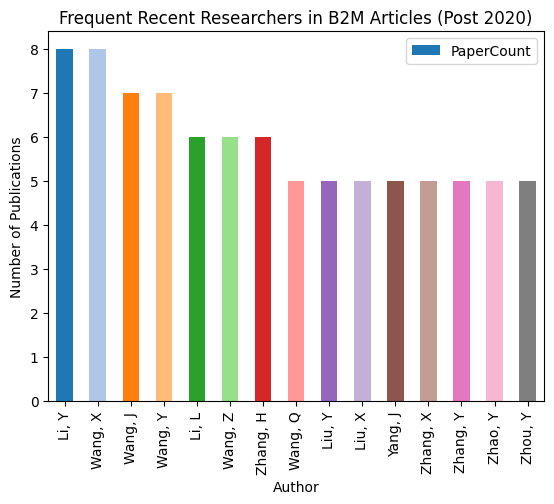

In [ ]:
#top 15 researchers and the papers they wrote - unique PMID

active15=recentauthors_count.head(15).index

authorPMID=(recentauthors[recentauthors['FullName'].isin(active15)].groupby('FullName')['PMID'].apply(lambda x: sorted(x.unique())).reset_index(name='PMIDs'))
authorPMID["PaperCount"] = authorPMID["PMIDs"].apply(len)
authorPMID = authorPMID.sort_values("PaperCount", ascending=False)

display(authorPMID)

barplotauthorPMID=authorPMID.plot(x='FullName', y='PaperCount',kind='bar', color=plt.cm.tab20(range(15)))
plt.title('Frequent Recent Researchers in B2M Articles (Post 2020)')
plt.xlabel('Author')
plt.ylabel('Number of Publications')
plt.show()

In [ ]:
#collab of the shortlist researchers:
# Y. Li
#X. Wang
#J.Wang
#Y. Wang
#L. Li
#Z. Wang
#H. Zhang


shortlist= ['Li, Y', 'Wang, X', 'Wang, J', 'Wang, Y', 'Li, L', 'Wang, Z', 'Zhang, H']

shortlist_coauthors = coauthor_summary[
    (coauthor_summary["Author1"].isin(shortlist)) &
    (coauthor_summary["Author2"].isin(shortlist))
].sort_values("Count", ascending=False)

display(shortlist_coauthors)


,Author1,Author2,Count,PMIDs


,Author1,Author2,Count,PMIDs
15883,"Wang, X","Zhang, H",4,"[33658560, 35368100, 36055572, 36868208]"
11550,"Li, L","Wang, X",3,"[35368100, 35841593, 36055572]"
15780,"Wang, J","Wang, Y",2,"[34323289, 35368100]"
15904,"Wang, Y","Wang, Z",2,"[36460227, 37526345]"
11567,"Li, L","Zhang, H",2,"[35368100, 36055572]"
11551,"Li, L","Wang, Y",2,"[35368100, 37526345]"
11726,"Li, Y","Wang, X",2,"[32746912, 35841593]"
11496,"Li, L","Li, Y",1,[35841593]
11547,"Li, L","Wang, J",1,[35368100]
11552,"Li, L","Wang, Z",1,[37526345]


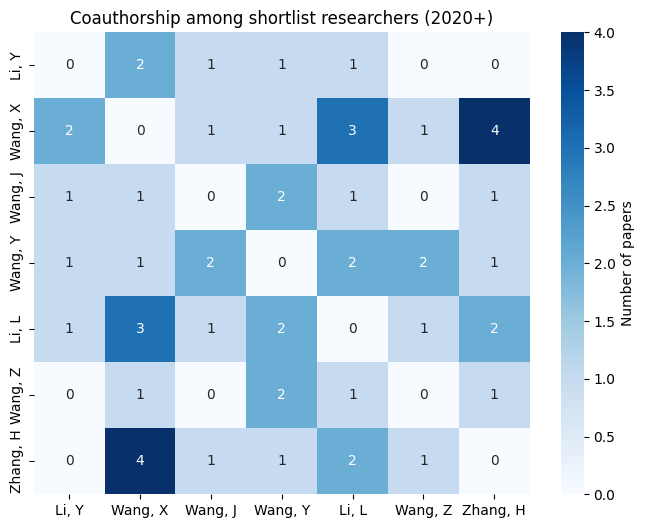

In [ ]:
from itertools import combinations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

mergingauthors = authors.merge(
    articles[["PMID", "Year"]],
    on="PMID",
    how="left"
)

authors_recent = mergingauthors[mergingauthors["Year"] >= 2020].copy()
authors_recent = authors_recent.dropna(subset=["AuthorInitials", "AuthorLastname"])


authors_recent["Author"] = authors_recent["AuthorLastname"].str.strip() + ", " + authors_recent["AuthorInitials"].str.strip()


coauthors_list = []

for pmid, group in authors_recent.groupby("PMID"):
    authors_in_pmid = group["Author"].unique()
    if len(authors_in_pmid) >= 2:
        for author1, author2 in combinations(sorted(authors_in_pmid), 2):
            coauthors_list.append((pmid, author1, author2))

coauthors = pd.DataFrame(coauthors_list, columns=["PMID", "Author1", "Author2"])

coauthor_summary = (
    coauthors.groupby(["Author1", "Author2"])
    .agg(
        Count=("PMID", "nunique"),
        PMIDs=("PMID", lambda x: list(x.unique()))
    )
    .reset_index()
)

shortlist = ['Li, Y', 'Wang, X', 'Wang, J', 'Wang, Y', 'Li, L', 'Wang, Z', 'Zhang, H']

shortlist_coauthors = coauthor_summary[
    (coauthor_summary["Author1"].isin(shortlist)) &
    (coauthor_summary["Author2"].isin(shortlist))
].sort_values("Count", ascending=False)

display(shortlist_coauthors)

matrix = pd.DataFrame(0, index=shortlist, columns=shortlist)

for _, row in shortlist_coauthors.iterrows():
    a, b, c = row["Author1"], row["Author2"], row["Count"]
    matrix.loc[a, b] = c
    matrix.loc[b, a] = c  # symmetric

plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="Blues", cbar_kws={'label': 'Number of papers'})
plt.title("Coauthorship among shortlist researchers (2020+)")
plt.show()


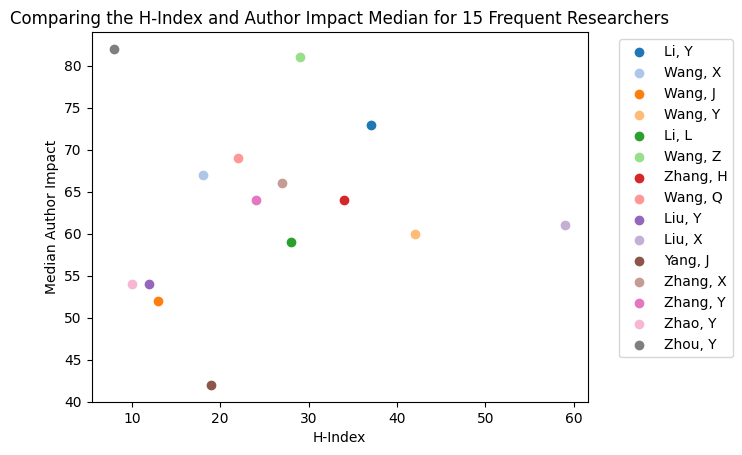

In [ ]:
#ZOOMING BACK OUT AND CONSIDERING IMPACT - H-INDEX

h_data = [
    ("Li, Y", 37, 73),
    ("Wang, X", 18, 67),
    ("Wang, J", 13, 52),
    ("Wang, Y", 42, 60),
    ("Li, L", 28, 59),
    ("Wang, Z", 29, 81),
    ("Zhang, H", 34, 64),
    ("Wang, Q", 22, 69),
    ("Liu, Y", 12, 54),
    ("Liu, X", 59, 61),
    ("Yang, J", 19, 42),
    ("Zhang, X", 27, 66),
    ("Zhang, Y", 24, 64),
    ("Zhao, Y", 10, 54),
    ("Zhou, Y", 8, 82),
]

h_df = pd.DataFrame(h_data, columns=["Researcher", "H-Index", "Median Author Impact"])


plt.figure()

# Iterate through each researcher and plot their point individually with a label
for i, row in h_df.iterrows():
    plt.scatter(
        row['H-Index'],
        row['Median Author Impact'],
        color=plt.cm.tab20(i),
        label=row['Researcher']
    )

plt.xlabel('H-Index')
plt.ylabel('Median Author Impact')
plt.title('Comparing the H-Index and Author Impact Median for 15 Frequent Researchers')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [28]:
# most popular words, word count for topics

#from the abstract doing count of different words

articles = articles[articles['Year']>=2020]
articles['Abstract'] = articles['Abstract'].astype(str)

#text processing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words=text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

articles['Abstract'] = articles['Abstract'].apply(preprocess_text)

from collections import Counter

all_words = []
for text in articles['Abstract']:
    words = text.split()
    all_words.extend(words)

word_counts = Counter(all_words)

#word_counts.most_common(300)




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# figuring out topics for these words

# first get rid of noise words not related to topicz (suggest reported etc.)
# also other words which are general - score, index, biology, gene


domain_noise = {

    'study','analysis','result','results','showed','found','performed',
    'reported','however','furthermore','conclusion','demonstrated',
    'suggest','respectively','included','including','addition','report',


    'high','low','higher','lower','increase','increased','reduced',
    'significant','significantly','difference','change',
    'one','two','three','four','five','total','number','n',


    'using','used','analyzed','evaluated','investigated',
    'identify','identified','detected','generated','selected',
    'present','based',


    'gene','cell','protein','molecular','biological','cellular',
    'system','mechanism','process','pathway','network',


    'model','algorithm','tool','software','approach','strategy',
    'validation','accurate','optimal','score','index',


    'common','various','well','important','novel','new',
    'overall','primary','major','early','future'
}


import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Correctly update the stop_words set to include domain_noise
stop_words = stop_words.union(domain_noise)

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  words = text.split()
  words = [word for word in words if word not in stop_words]
  return ' '.join(words)


articles['Abstract'] = articles['Abstract'].apply(preprocess_text)



from sklearn.feature_extraction.text import TfidfVectorizer


texts = articles["Abstract"]

vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2)
)

tfidf = vectorizer.fit_transform(texts)
terms = vectorizer.get_feature_names_out()

from sklearn.decomposition import NMF

N_TOPICS = 8

nmf = NMF(n_components=N_TOPICS, random_state=42)
nmf.fit(tfidf)


def show_topics(model, feature_names, n_words=12):
    for i, topic in enumerate(model.components_):
        top_terms = [feature_names[j] for j in topic.argsort()[-n_words:]]
        print(f"\nTOPIC {i}")
        print(", ".join(top_terms))


print("\nDISCOVERED TOPICS:\n")
show_topics(nmf, terms)

topic_matrix = nmf.transform(tfidf)
articles["dominant_topic"] = topic_matrix.argmax(axis=1)

print("\nPAPERS PER TOPIC:\n")
print(articles["dominant_topic"].value_counts().sort_index())




DISCOVERED TOPICS:


TOPIC 0
therapy, treatment, response, patient, immune checkpoint, checkpoint, resistance, mutation, immunotherapy, cancer, tumor, immune

TOPIC 1
different, ywhaz, rtqpcr, hprt, rg, actb, line, gapdh, stability, stable, expression, reference

TOPIC 2
crisprcas, human, editing, hla class, hlai, rejection, universal, ipscs, stem, nk, allogeneic, hla

TOPIC 3
injury, rate, urinary, egfr, filtration rate, glomerular filtration, glomerular, filtration, kidney, creatinine, cystatin, equation

TOPIC 4
diffuse large, patient, mutational, variant, large, large bcell, bcell lymphoma, dlbcl, bcell, mutation, lymphoma, case

TOPIC 5
proteinprotein, proteinprotein interaction, mrna, rna, group, upregulated, sample, infection, sarscov, expression, interaction, biomarkers

TOPIC 6
response, surface, mhc class, histocompatibility complex, histocompatibility, complex, leukocyte, antigen, leukocyte antigen, human, mhc, class

TOPIC 7
clinical, dialysis, month, prognostic, concentra

On inspection of the words..


*   topic 0: Cancer immunotherapy and immune resistance
*   topic 1: B2M reference gener and expression normalisation control


*   topic 2: genome editing, cell therapy

*   3; Renal Function and Kidney Injury

*  4; b2m alterations in b-cell lymphoma
*   5;b2m expression netwroks and infection related biomarkers


*   6; mhc class I antigen presentation biology


*   7; chronic disease/long term monitoring






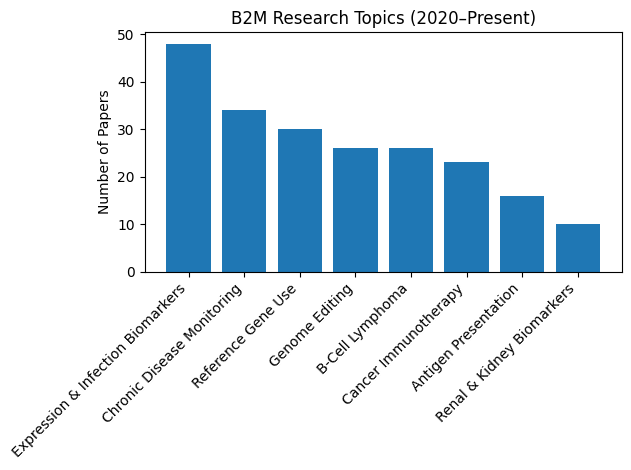

In [ ]:
topic_labels = {
   0: "Cancer Immunotherapy",
    1: "Reference Gene Use",
    2: "Genome Editing",
    3: "Renal & Kidney Biomarkers",
    4: "B-Cell Lymphoma",
    5: "Expression & Infection Biomarkers",
    6: "Antigen Presentation",
    7: "Chronic Disease Monitoring"
}
articles["dominant_topic_label"] = articles["dominant_topic"].map(topic_labels)

topic_counts = (
    articles["dominant_topic_label"]
    .value_counts()
)

plt.figure()
plt.bar(topic_counts.index, topic_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Papers")
plt.title("B2M Research Topics (2020–Present)")
plt.tight_layout()
plt.show()



TOPIC 0
level, treatment, therapeutic, response, potential, expression, immunity, correlated, prognosis, carcinoma, immune, immunotherapy

TOPIC 1
data, upregulated, prognostic, activity, immune, response, rna, cd, factor, presentation, expression, antigen

TOPIC 2
bestkeeper, realtime, tissue, candidate, different, stage, gapdh, expression, qrtpcr, stability, stable, reference

TOPIC 3
tumor, activity, disease, without, prognostic, alteration, large, lymphoma, dna, sequencing, patient, mutation

TOPIC 4
microglobulin, immune, killer, natural, natural killer, via, leukocyte, expression, class, hla, stem, human

TOPIC 5
complex, cd, revealed, upregulated, genetic, disease, related, role, associated, function, plasma, interaction

TOPIC 6
could, compared, upregulated, candidate, clinical, burden, potential, diagnosis, group, cancer, patient, biomarkers

TOPIC 7
complex, regulation, clinical, diagnosis, malignant, tissue, treatment, function, growth, method, cancer, tumor


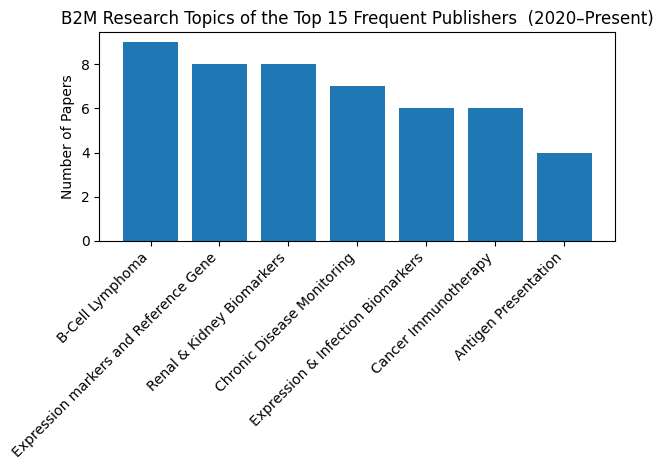

In [34]:
#considering our top 15

top15 = ['Li, Y', 'Wang, X', 'Wang, J', 'Wang, Y', 'Li, L', 'Wang, Z', 'Zhang, H', 'Wang, Q', 'Liu, Y', 'Liu, X', 'Yang, J', 'Zhang, X', 'Zhang, Y', 'Zhao, Y', 'Zhou, Y']

authors['FullName'] = authors['AuthorLastname'].str.strip() + ', ' + authors['AuthorInitials'].str.strip()

mergingauthors = authors.merge(
    articles[["PMID", "Year"]],
    on="PMID",
    how="left"
)

authors_recent = mergingauthors[mergingauthors["Year"] >= 2020].copy()
authors_recent = authors_recent.dropna(subset=["AuthorInitials", "AuthorLastname"])

authors_top15 = authors_recent[authors_recent['FullName'].isin(top15)]

authorPMID=(recentauthors[recentauthors['FullName'].isin(active15)].groupby('FullName')['PMID'].apply(lambda x: sorted(x.unique())).reset_index(name='PMIDs'))

unique_PMIDs = sorted(authors_top15["PMID"].unique())

articles_top15 = articles[articles["PMID"].isin(unique_PMIDs)].copy()
articles_top15 = articles_top15[articles_top15["Year"] >= 2020].copy()
articles_top15["Abstract"] = articles_top15["Abstract"].astype(str)

domain_noise = {
    'study','analysis','result','results','showed','found','performed','reported',
    'however','furthermore','conclusion','demonstrated','suggest','respectively',
    'included','including','addition','report','high','low','higher','lower',
    'increase','increased','reduced','significant','significantly','difference','change',
    'one','two','three','four','five','total','number','n','using','used','analyzed',
    'evaluated','investigated','identify','identified','detected','generated','selected',
    'present','based','gene','cell','protein','molecular','biological','cellular','system',
    'mechanism','process','pathway','network','model','algorithm','tool','software','approach',
    'strategy','validation','accurate','optimal','score','index','common','various','well',
    'important','novel','new','overall','primary','major','early','future'
}

# Ensure stop_words is defined before union, or re-import/redefine as necessary
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Re-initialize stop_words as it was modified in the previous cell and not reset
stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(domain_noise)

def preprocess_text(text):
  text = text.lower()
  text = re.sub(r'[^a-z\s]', '', text)
  words = text.split()
  words = [word for word in words if word not in stop_words]
  return ' '.join(words)


articles_top15['Abstract'] = articles_top15['Abstract'].apply(preprocess_text)

# Use abstracts from articles_top15 for vectorization and NMF
texts_top15 = articles_top15["Abstract"]

vectorizer = TfidfVectorizer(
    min_df=5,
    max_df=0.8,
    ngram_range=(1, 2)
)

tfidf_top15 = vectorizer.fit_transform(texts_top15)
terms_top15 = vectorizer.get_feature_names_out()

from sklearn.decomposition import NMF

N_TOPICS = 8

nmf = NMF(n_components=N_TOPICS, random_state=42)
nmf.fit(tfidf_top15)


def show_topics(model, feature_names, n_words=12):
    for i, topic in enumerate(model.components_):
        top_terms = [feature_names[j] for j in topic.argsort()[-n_words:]]
        print(f"\nTOPIC {i}")
        print(", ".join(top_terms))


#print("\nDISCOVERED TOPICS:\n")
show_topics(nmf, terms_top15)

topic_matrix = nmf.transform(tfidf_top15)
articles_top15["dominant_topic"] = topic_matrix.argmax(axis=1)

#print("\nPAPERS PER TOPIC:\n")
#print(articles["dominant_topic"].value_counts().sort_index())


topic_labels = {
   0: "Cancer Immunotherapy",
    1: "Expression markers and Reference Gene",
    2: "Expression markers and Reference Gene",
    3: "Renal & Kidney Biomarkers",
    4: "B-Cell Lymphoma",
    5: "Expression & Infection Biomarkers",
    6: "Antigen Presentation",
    7: "Chronic Disease Monitoring"
}
articles_top15["dominant_topic_label"] = articles_top15["dominant_topic"].map(topic_labels)

topic_counts = (
    articles_top15["dominant_topic_label"]
    .value_counts()
)

plt.figure()
plt.bar(topic_counts.index, topic_counts.values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Papers")
plt.title("B2M Research Topics of the Top 15 Frequent Publishers  (2020–Present)")
plt.tight_layout()
plt.show()